In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import PIL
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
import random
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf

from numpy import save
from numpy import load

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import Input, Model

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten

In [2]:
X = load('G:/Desktop/cat dog/data100(3).npy')
y = load('G:/Desktop/cat dog/y100(3).npy')

In [3]:
y = y.reshape(45091,1)
y = y.flatten()

In [4]:
x_train = X[:36000]
y_train = y[:36000]
x_dev = X[36000:40500]
y_dev = y[36000:40500]
x_test = X[40500:]
y_test = y[40500:]

In [5]:
x_train.shape,y_train.shape,x_dev.shape,y_dev.shape,x_test.shape,y_test.shape

((36000, 128, 128, 3),
 (36000,),
 (4500, 128, 128, 3),
 (4500,),
 (4591, 128, 128, 3),
 (4591,))

In [6]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dev_dataset = tf.data.Dataset.from_tensor_slices((x_dev, y_dev))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [7]:
BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = dev_dataset.batch(BATCH_SIZE)
test_batches = test_dataset.batch(BATCH_SIZE)

In [8]:
IMG_SHAPE = (128, 128, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 50s 5us/step


In [9]:
base_model.trainable = False

In [10]:
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [11]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
predictions = tf.keras.layers.Dense(1)(x)

In [12]:
model = Model(inputs=base_model.input, outputs=predictions)

In [1]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

NameError: name 'model' is not defined

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
______________________________________________________________________________________________

In [15]:
len(model.trainable_variables)

2

In [16]:
initial_epochs = 35
validation_steps=20

In [17]:
%%time
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

Train for 282 steps, validate for 36 steps
Epoch 1/35
282/282 [==============================] - 67s 238ms/step - loss: 0.4517 - accuracy: 0.7890 - val_loss: 0.2472 - val_accuracy: 0.9016
Epoch 2/35
282/282 [==============================] - 58s 204ms/step - loss: 0.2466 - accuracy: 0.9053 - val_loss: 0.2117 - val_accuracy: 0.9091
Epoch 3/35
282/282 [==============================] - 57s 203ms/step - loss: 0.1974 - accuracy: 0.9236 - val_loss: 0.2038 - val_accuracy: 0.9138
Epoch 4/35
282/282 [==============================] - 57s 203ms/step - loss: 0.1793 - accuracy: 0.9285 - val_loss: 0.2008 - val_accuracy: 0.9178
Epoch 5/35
282/282 [==============================] - 57s 201ms/step - loss: 0.1681 - accuracy: 0.9327 - val_loss: 0.2077 - val_accuracy: 0.9171
Epoch 6/35
282/282 [==============================] - 56s 197ms/step - loss: 0.1590 - accuracy: 0.9367 - val_loss: 0.2139 - val_accuracy: 0.9147
Epoch 7/35
282/282 [==============================] - 56s 197ms/step - loss: 0.1532 - a

KeyboardInterrupt: 

In [17]:
%%time
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

Train for 141 steps, validate for 18 steps
Epoch 1/35
141/141 [==============================] - 51s 365ms/step - loss: 0.4943 - accuracy: 0.7620 - val_loss: 0.3336 - val_accuracy: 0.8564
Epoch 2/35
141/141 [==============================] - 40s 284ms/step - loss: 0.3074 - accuracy: 0.8810 - val_loss: 0.2632 - val_accuracy: 0.8833
Epoch 3/35
141/141 [==============================] - 40s 284ms/step - loss: 0.2367 - accuracy: 0.9097 - val_loss: 0.2336 - val_accuracy: 0.8976
Epoch 4/35
141/141 [==============================] - 40s 284ms/step - loss: 0.2045 - accuracy: 0.9208 - val_loss: 0.2218 - val_accuracy: 0.9071
Epoch 5/35
141/141 [==============================] - 40s 284ms/step - loss: 0.1868 - accuracy: 0.9277 - val_loss: 0.2183 - val_accuracy: 0.9104
Epoch 6/35
141/141 [==============================] - 40s 285ms/step - loss: 0.1733 - accuracy: 0.9326 - val_loss: 0.2100 - val_accuracy: 0.9144
Epoch 7/35
141/141 [==============================] - 40s 284ms/step - loss: 0.1665 - a

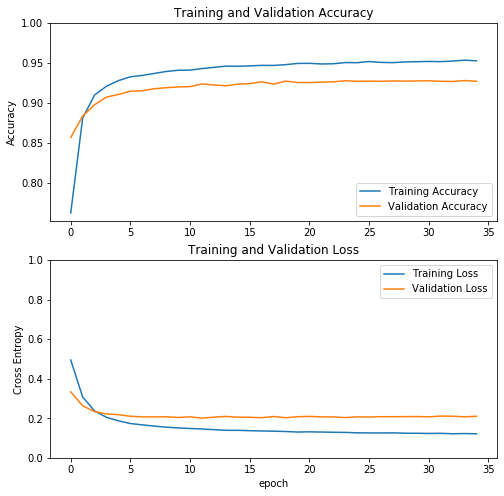

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [19]:
model.evaluate(validation_batches), model.evaluate(test_batches)

18/18 [==============================] - 5s 280ms/step - loss: 0.2381 - accuracy: 0.9174


([0.21012763430674872, 0.9268889], [0.23814715362257427, 0.91744715])

# fine tuning

In [20]:
base_model.trainable = True

In [21]:
len(base_model.layers)

155

In [22]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

Number of layers in the base model:  155


In [23]:
model.compile(loss=tf.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.optimizers.RMSprop(lr=base_learning_rate/100),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [24]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
______________________________________________________________________________________________

In [25]:
len(model.trainable_variables)

58

In [26]:
%%time
fine_tune_epochs = 20
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_batches,
                         epochs=total_epochs,
                         initial_epoch =  history.epoch[-1],
                         validation_data=validation_batches)

Train for 141 steps, validate for 18 steps
Epoch 35/55
141/141 [==============================] - 59s 421ms/step - loss: 0.1195 - accuracy: 0.9544 - val_loss: 0.1805 - val_accuracy: 0.9360
Epoch 36/55
141/141 [==============================] - 53s 374ms/step - loss: 0.1120 - accuracy: 0.9582 - val_loss: 0.1627 - val_accuracy: 0.9413
Epoch 37/55
141/141 [==============================] - 53s 374ms/step - loss: 0.1091 - accuracy: 0.9586 - val_loss: 0.1522 - val_accuracy: 0.9438
Epoch 38/55
141/141 [==============================] - 53s 373ms/step - loss: 0.1046 - accuracy: 0.9607 - val_loss: 0.1445 - val_accuracy: 0.9440
Epoch 39/55
141/141 [==============================] - 53s 373ms/step - loss: 0.1000 - accuracy: 0.9617 - val_loss: 0.1404 - val_accuracy: 0.9453
Epoch 40/55
141/141 [==============================] - 53s 374ms/step - loss: 0.0961 - accuracy: 0.9632 - val_loss: 0.1362 - val_accuracy: 0.9469
Epoch 41/55
141/141 [==============================] - 53s 375ms/step - loss: 0.0

In [27]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

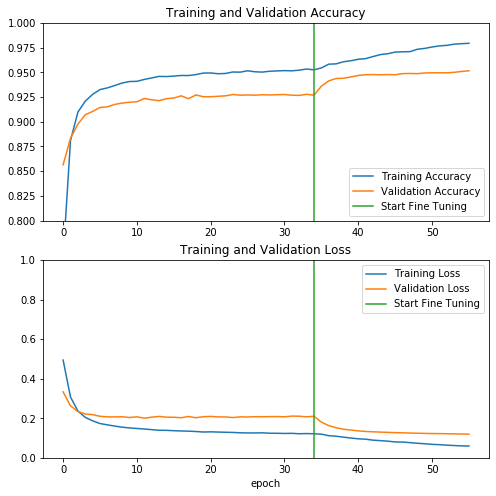

In [28]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [29]:
model.evaluate(validation_batches), model.evaluate(test_batches)

18/18 [==============================] - 4s 231ms/step - loss: 0.1351 - accuracy: 0.9469


([0.11959576855103175, 0.95155555], [0.13512133517199093, 0.94685256])

In [35]:
model.evaluate(validation_batches), model.evaluate(test_batches)

36/36 [==============================] - 4s 119ms/step - loss: 0.1371 - accuracy: 0.9449


([0.12219872408443028, 0.95155555], [0.1371222897950146, 0.94489217])